In [12]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,  mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
import optuna
import tensorflow as tf
from itertools import product
from keras.callbacks import ReduceLROnPlateau
from sklearn import metrics
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping
from methods import *

In [13]:

best_loss = 10000000000000000000000000
def objective(trial):
    global best_loss

    model = Sequential()

    #hyperparameterspace
    learning_rate_reduction = ReduceLROnPlateau(monitor='loss',
                                                patience=trial.suggest_uniform("patience",1,10),
                                                verbose=1,
                                                factor=trial.suggest_uniform("factor",0,1),
                                                min_lr=trial.suggest_uniform("min_lr",0.00001,0.01))
    
    model.add(Dense(units=trial.suggest_int('First_Layer', 520, 8888),input_dim=2333,activation = 'relu'))


    for i in range(trial.suggest_int('num_dense_layers', 1, 5)):
        model.add(Dense(
            units=trial.suggest_int('units{}'.format(i), 250, 4666),
            activation='relu',
        ))
#should be float?
        model.add(Dropout(trial.suggest_uniform('dropout_rate{}'.format(i), 0.0, 0.1)))

    model.add(Dense(2))

    #optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=trial.suggest_float('learning_rate', 1e-6, 1e-2))

    model.compile(optimizer=optimizer,
                  loss='mse' ,    metrics=[tf.keras.metrics.RootMeanSquaredError()])

    batch_size=trial.suggest_int('batch_size',64, 512)
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=6,
        batch_size=batch_size,
        callbacks=learning_rate_reduction
#add early stop?
    )

    loss = history.history['loss'][-1]

    if loss < best_loss:
        model.save(path_best_model)
        best_loss = loss
    del model

    return loss

In [14]:
initial_learning_rate = 0.01
epochs = 12

In [15]:
x, y_lon, y_lat=fetch_data("x","y",2333,1,2)

In [16]:
x_scaler, x_scaled = Scaling(x)
lon_scaler, lon_scaled=Scaling(y_lon)
lat_scaler, lat_scaled=Scaling(y_lat)

y_scaled=np.append(lon_scaled,lat_scaled,axis = 1)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3) #, random_state=

In [26]:
path_best_model = 'OptunaTPE.2'
study_name = "optuna_2"
storage_name = "sqlite:///{}.db".format(study_name)

study = optuna.create_study(
    direction='minimize',
    study_name=study_name,
    storage=storage_name,
    load_if_exists=True,
)
study.optimize(objective, n_trials=60)

[I 2022-07-14 22:01:09,722] Using an existing study with name 'optuna_2' instead of creating a new one.


Epoch 1/6
12/12 [==============================] - 2s 114ms/step - loss: 0.3617 - root_mean_squared_error: 0.6014 - lr: 7.8069e-04
Epoch 2/6
12/12 [==============================] - 1s 112ms/step - loss: 0.1156 - root_mean_squared_error: 0.3400 - lr: 7.8069e-04
Epoch 3/6
12/12 [==============================] - 1s 112ms/step - loss: 0.0349 - root_mean_squared_error: 0.1867 - lr: 7.8069e-04
Epoch 4/6
12/12 [==============================] - 1s 112ms/step - loss: 0.0185 - root_mean_squared_error: 0.1361 - lr: 7.8069e-04
Epoch 5/6
12/12 [==============================] - 1s 115ms/step - loss: 0.0122 - root_mean_squared_error: 0.1103 - lr: 7.8069e-04
Epoch 6/6
12/12 [==============================] - 1s 113ms/step - loss: 0.0098 - root_mean_squared_error: 0.0990 - lr: 7.8069e-04


[I 2022-07-14 22:01:18,689] Trial 185 finished with value: 0.009798208251595497 and parameters: {'patience': 3.0009483914688033, 'factor': 0.8721758189130415, 'min_lr': 0.009764404491627321, 'First_Layer': 1386, 'num_dense_layers': 1, 'units0': 4491, 'dropout_rate0': 0.005103830264074491, 'learning_rate': 0.0007806870379067061, 'batch_size': 375}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 73ms/step - loss: 0.0886 - root_mean_squared_error: 0.2977 - lr: 1.7882e-04
Epoch 2/6
11/11 [==============================] - 1s 77ms/step - loss: 0.0362 - root_mean_squared_error: 0.1902 - lr: 1.7882e-04
Epoch 3/6
11/11 [==============================] - 1s 70ms/step - loss: 0.0216 - root_mean_squared_error: 0.1468 - lr: 1.7882e-04
Epoch 4/6
11/11 [==============================] - 1s 70ms/step - loss: 0.0149 - root_mean_squared_error: 0.1220 - lr: 1.7882e-04
Epoch 5/6
11/11 [==============================] - 1s 73ms/step - loss: 0.0117 - root_mean_squared_error: 0.1084 - lr: 1.7882e-04
Epoch 6/6
11/11 [==============================] - 1s 70ms/step - loss: 0.0103 - root_mean_squared_error: 0.1014 - lr: 1.7882e-04


[I 2022-07-14 22:01:24,111] Trial 186 finished with value: 0.010291192680597305 and parameters: {'patience': 2.5715191303170277, 'factor': 0.9035786947346913, 'min_lr': 0.009004052304853263, 'First_Layer': 708, 'num_dense_layers': 1, 'units0': 4339, 'dropout_rate0': 0.0030790619071288526, 'learning_rate': 0.00017882368090724925, 'batch_size': 410}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 83ms/step - loss: 0.0838 - root_mean_squared_error: 0.2894 - lr: 3.7998e-04
Epoch 2/6
13/13 [==============================] - 1s 83ms/step - loss: 0.0235 - root_mean_squared_error: 0.1534 - lr: 3.7998e-04
Epoch 3/6
13/13 [==============================] - 1s 83ms/step - loss: 0.0132 - root_mean_squared_error: 0.1149 - lr: 3.7998e-04
Epoch 4/6
13/13 [==============================] - 1s 82ms/step - loss: 0.0104 - root_mean_squared_error: 0.1018 - lr: 3.7998e-04
Epoch 5/6
13/13 [==============================] - 1s 83ms/step - loss: 0.0091 - root_mean_squared_error: 0.0954 - lr: 3.7998e-04
Epoch 6/6
13/13 [==============================] - 1s 84ms/step - loss: 0.0085 - root_mean_squared_error: 0.0923 - lr: 3.7998e-04


[I 2022-07-14 22:01:31,262] Trial 187 finished with value: 0.00851877685636282 and parameters: {'patience': 3.285333050693074, 'factor': 0.9535134705477569, 'min_lr': 0.007992112842782525, 'First_Layer': 985, 'num_dense_layers': 1, 'units0': 4564, 'dropout_rate0': 0.0091177013271692, 'learning_rate': 0.00037997683579382106, 'batch_size': 358}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 57ms/step - loss: 0.1849 - root_mean_squared_error: 0.4300 - lr: 0.0011
Epoch 2/6
12/12 [==============================] - 1s 61ms/step - loss: 0.0447 - root_mean_squared_error: 0.2115 - lr: 0.0011
Epoch 3/6
12/12 [==============================] - 1s 60ms/step - loss: 0.0208 - root_mean_squared_error: 0.1443 - lr: 0.0011
Epoch 4/6
12/12 [==============================] - 1s 59ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135 - lr: 0.0011
Epoch 5/6
12/12 [==============================] - 1s 58ms/step - loss: 0.0102 - root_mean_squared_error: 0.1009 - lr: 0.0011
Epoch 6/6
12/12 [==============================] - 1s 58ms/step - loss: 0.0089 - root_mean_squared_error: 0.0943 - lr: 0.0011


[I 2022-07-14 22:01:36,201] Trial 188 finished with value: 0.008891893550753593 and parameters: {'patience': 2.7563282053698512, 'factor': 0.8463977205014359, 'min_lr': 0.009326744563194525, 'First_Layer': 526, 'num_dense_layers': 1, 'units0': 4660, 'dropout_rate0': 0.0065363067767503676, 'learning_rate': 0.0011432156982706214, 'batch_size': 390}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
14/14 [==============================] - 1s 64ms/step - loss: 0.0990 - root_mean_squared_error: 0.3146 - lr: 6.1881e-04
Epoch 2/6
14/14 [==============================] - 1s 68ms/step - loss: 0.0238 - root_mean_squared_error: 0.1544 - lr: 6.1881e-04
Epoch 3/6
14/14 [==============================] - 1s 64ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - lr: 6.1881e-04
Epoch 4/6
14/14 [==============================] - 1s 64ms/step - loss: 0.0099 - root_mean_squared_error: 0.0995 - lr: 6.1881e-04
Epoch 5/6
14/14 [==============================] - 1s 64ms/step - loss: 0.0088 - root_mean_squared_error: 0.0939 - lr: 6.1881e-04
Epoch 6/6
14/14 [==============================] - 1s 64ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - lr: 6.1881e-04
INFO:tensorflow:Assets written to: OptunaTPE.2\assets


[I 2022-07-14 22:01:43,003] Trial 189 finished with value: 0.008322970941662788 and parameters: {'patience': 3.1086698767414522, 'factor': 0.6459087782942009, 'min_lr': 0.008727930084400183, 'First_Layer': 814, 'num_dense_layers': 1, 'units0': 4486, 'dropout_rate0': 0.002150773624087845, 'learning_rate': 0.0006188060933126831, 'batch_size': 318}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 40ms/step - loss: 0.0990 - root_mean_squared_error: 0.3146 - lr: 8.7513e-04
Epoch 2/6
12/12 [==============================] - 1s 42ms/step - loss: 0.0236 - root_mean_squared_error: 0.1537 - lr: 8.7513e-04
Epoch 3/6
12/12 [==============================] - 0s 38ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - lr: 8.7513e-04
Epoch 4/6
12/12 [==============================] - 0s 38ms/step - loss: 0.0102 - root_mean_squared_error: 0.1008 - lr: 8.7513e-04
Epoch 5/6
12/12 [==============================] - 0s 40ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949 - lr: 8.7513e-04
Epoch 6/6
12/12 [==============================] - 0s 38ms/step - loss: 0.0087 - root_mean_squared_error: 0.0934 - lr: 8.7513e-04


[I 2022-07-14 22:01:46,839] Trial 190 finished with value: 0.008729876950383186 and parameters: {'patience': 2.1267346248777748, 'factor': 0.6972554890579908, 'min_lr': 0.00959134839926756, 'First_Layer': 1615, 'num_dense_layers': 1, 'units0': 348, 'dropout_rate0': 2.413741558206662e-05, 'learning_rate': 0.0008751269585176979, 'batch_size': 379}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 2s 97ms/step - loss: 0.0994 - root_mean_squared_error: 0.3153 - lr: 2.4316e-04
Epoch 2/6
12/12 [==============================] - 1s 96ms/step - loss: 0.0266 - root_mean_squared_error: 0.1631 - lr: 2.4316e-04
Epoch 3/6
12/12 [==============================] - 1s 96ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313 - lr: 2.4316e-04
Epoch 4/6
12/12 [==============================] - 1s 97ms/step - loss: 0.0124 - root_mean_squared_error: 0.1115 - lr: 2.4316e-04
Epoch 5/6
12/12 [==============================] - 1s 96ms/step - loss: 0.0104 - root_mean_squared_error: 0.1021 - lr: 2.4316e-04
Epoch 6/6
12/12 [==============================] - 1s 97ms/step - loss: 0.0093 - root_mean_squared_error: 0.0965 - lr: 2.4316e-04


[I 2022-07-14 22:01:54,600] Trial 191 finished with value: 0.009308802895247936 and parameters: {'patience': 2.383003305956666, 'factor': 0.887251504421129, 'min_lr': 0.009998994534116573, 'First_Layer': 1198, 'num_dense_layers': 1, 'units0': 4200, 'dropout_rate0': 0.004386403027977406, 'learning_rate': 0.0002431557855435425, 'batch_size': 402}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 88ms/step - loss: 0.1773 - root_mean_squared_error: 0.4211 - lr: 6.4477e-04
Epoch 2/6
13/13 [==============================] - 1s 84ms/step - loss: 0.0302 - root_mean_squared_error: 0.1737 - lr: 6.4477e-04
Epoch 3/6
13/13 [==============================] - 1s 85ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - lr: 6.4477e-04
Epoch 4/6
13/13 [==============================] - 1s 84ms/step - loss: 0.0111 - root_mean_squared_error: 0.1051 - lr: 6.4477e-04
Epoch 5/6
13/13 [==============================] - 1s 84ms/step - loss: 0.0093 - root_mean_squared_error: 0.0963 - lr: 6.4477e-04
Epoch 6/6
13/13 [==============================] - 1s 84ms/step - loss: 0.0086 - root_mean_squared_error: 0.0927 - lr: 6.4477e-04


[I 2022-07-14 22:02:01,916] Trial 192 finished with value: 0.008591500110924244 and parameters: {'patience': 2.9745239798302965, 'factor': 0.8238115508858058, 'min_lr': 0.005423213169389554, 'First_Layer': 1004, 'num_dense_layers': 1, 'units0': 4604, 'dropout_rate0': 0.0030041213533478937, 'learning_rate': 0.0006447717412368171, 'batch_size': 350}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 76ms/step - loss: 0.1788 - root_mean_squared_error: 0.4229 - lr: 7.5350e-04
Epoch 2/6
13/13 [==============================] - 1s 73ms/step - loss: 0.0317 - root_mean_squared_error: 0.1781 - lr: 7.5350e-04
Epoch 3/6
13/13 [==============================] - 1s 73ms/step - loss: 0.0166 - root_mean_squared_error: 0.1288 - lr: 7.5350e-04
Epoch 4/6
13/13 [==============================] - 1s 72ms/step - loss: 0.0112 - root_mean_squared_error: 0.1060 - lr: 7.5350e-04
Epoch 5/6
13/13 [==============================] - 1s 73ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - lr: 7.5350e-04
Epoch 6/6
13/13 [==============================] - 1s 73ms/step - loss: 0.0086 - root_mean_squared_error: 0.0928 - lr: 7.5350e-04


[I 2022-07-14 22:02:08,327] Trial 193 finished with value: 0.008604584261775017 and parameters: {'patience': 2.899383186042962, 'factor': 0.8056245635103482, 'min_lr': 0.009126221277410675, 'First_Layer': 832, 'num_dense_layers': 1, 'units0': 4658, 'dropout_rate0': 0.0019311335567383573, 'learning_rate': 0.0007535033130190297, 'batch_size': 363}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
14/14 [==============================] - 1s 80ms/step - loss: 0.0897 - root_mean_squared_error: 0.2996 - lr: 4.5014e-04
Epoch 2/6
14/14 [==============================] - 1s 80ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - lr: 4.5014e-04
Epoch 3/6
14/14 [==============================] - 1s 78ms/step - loss: 0.0127 - root_mean_squared_error: 0.1127 - lr: 4.5014e-04
Epoch 4/6
14/14 [==============================] - 1s 77ms/step - loss: 0.0101 - root_mean_squared_error: 0.1005 - lr: 4.5014e-04
Epoch 5/6
14/14 [==============================] - 1s 78ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - lr: 4.5014e-04
Epoch 6/6
14/14 [==============================] - 1s 77ms/step - loss: 0.0085 - root_mean_squared_error: 0.0924 - lr: 4.5014e-04


[I 2022-07-14 22:02:15,621] Trial 194 finished with value: 0.008543490432202816 and parameters: {'patience': 2.5991263806348193, 'factor': 0.8612848189950507, 'min_lr': 0.009261229619460477, 'First_Layer': 1027, 'num_dense_layers': 1, 'units0': 4423, 'dropout_rate0': 0.006304169065562083, 'learning_rate': 0.00045013929941737464, 'batch_size': 335}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 60ms/step - loss: 0.0868 - root_mean_squared_error: 0.2946 - lr: 6.0602e-04
Epoch 2/6
12/12 [==============================] - 1s 63ms/step - loss: 0.0232 - root_mean_squared_error: 0.1524 - lr: 6.0602e-04
Epoch 3/6
12/12 [==============================] - 1s 62ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - lr: 6.0602e-04
Epoch 4/6
12/12 [==============================] - 1s 62ms/step - loss: 0.0103 - root_mean_squared_error: 0.1016 - lr: 6.0602e-04
Epoch 5/6
12/12 [==============================] - 1s 60ms/step - loss: 0.0089 - root_mean_squared_error: 0.0942 - lr: 6.0602e-04
Epoch 6/6
12/12 [==============================] - 1s 61ms/step - loss: 0.0083 - root_mean_squared_error: 0.0912 - lr: 6.0602e-04
INFO:tensorflow:Assets written to: OptunaTPE.2\assets


[I 2022-07-14 22:02:21,330] Trial 195 finished with value: 0.008320418186485767 and parameters: {'patience': 3.0982432479761086, 'factor': 0.908471294930926, 'min_lr': 0.009749263256935491, 'First_Layer': 644, 'num_dense_layers': 1, 'units0': 4528, 'dropout_rate0': 0.003891884012943333, 'learning_rate': 0.0006060205669083575, 'batch_size': 371}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 54ms/step - loss: 0.1162 - root_mean_squared_error: 0.3408 - lr: 9.2628e-04
Epoch 2/6
13/13 [==============================] - 1s 58ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641 - lr: 9.2628e-04
Epoch 3/6
13/13 [==============================] - 1s 55ms/step - loss: 0.0138 - root_mean_squared_error: 0.1174 - lr: 9.2628e-04
Epoch 4/6
13/13 [==============================] - 1s 55ms/step - loss: 0.0103 - root_mean_squared_error: 0.1013 - lr: 9.2628e-04
Epoch 5/6
13/13 [==============================] - 1s 55ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - lr: 9.2628e-04
Epoch 6/6
13/13 [==============================] - 1s 54ms/step - loss: 0.0083 - root_mean_squared_error: 0.0913 - lr: 9.2628e-04


[I 2022-07-14 22:02:26,293] Trial 196 finished with value: 0.008332190103828907 and parameters: {'patience': 2.783921961176077, 'factor': 0.8225732288880316, 'min_lr': 0.009505116408812702, 'First_Layer': 525, 'num_dense_layers': 1, 'units0': 4581, 'dropout_rate0': 0.007992702191251859, 'learning_rate': 0.0009262763172400846, 'batch_size': 345}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
15/15 [==============================] - 1s 68ms/step - loss: 0.0812 - root_mean_squared_error: 0.2849 - lr: 3.9571e-04
Epoch 2/6
15/15 [==============================] - 1s 68ms/step - loss: 0.0204 - root_mean_squared_error: 0.1428 - lr: 3.9571e-04
Epoch 3/6
15/15 [==============================] - 1s 67ms/step - loss: 0.0124 - root_mean_squared_error: 0.1113 - lr: 3.9571e-04
Epoch 4/6
15/15 [==============================] - 1s 66ms/step - loss: 0.0097 - root_mean_squared_error: 0.0984 - lr: 3.9571e-04
Epoch 5/6
15/15 [==============================] - 1s 65ms/step - loss: 0.0088 - root_mean_squared_error: 0.0937 - lr: 3.9571e-04
Epoch 6/6
15/15 [==============================] - 1s 68ms/step - loss: 0.0084 - root_mean_squared_error: 0.0917 - lr: 3.9571e-04


[I 2022-07-14 22:02:33,014] Trial 197 finished with value: 0.008413577452301979 and parameters: {'patience': 3.240648501050838, 'factor': 0.6000575513365064, 'min_lr': 0.008328646839415803, 'First_Layer': 900, 'num_dense_layers': 1, 'units0': 4340, 'dropout_rate0': 0.005153583496074744, 'learning_rate': 0.00039571373308754093, 'batch_size': 298}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 74ms/step - loss: 0.2505 - root_mean_squared_error: 0.5005 - lr: 5.2181e-06
Epoch 2/6
12/12 [==============================] - 1s 73ms/step - loss: 0.1821 - root_mean_squared_error: 0.4267 - lr: 5.2181e-06
Epoch 3/6
12/12 [==============================] - 1s 72ms/step - loss: 0.1317 - root_mean_squared_error: 0.3630 - lr: 5.2181e-06
Epoch 4/6
12/12 [==============================] - 1s 71ms/step - loss: 0.0973 - root_mean_squared_error: 0.3120 - lr: 5.2181e-06
Epoch 5/6
12/12 [==============================] - 1s 69ms/step - loss: 0.0764 - root_mean_squared_error: 0.2764 - lr: 5.2181e-06
Epoch 6/6
12/12 [==============================] - 1s 71ms/step - loss: 0.0644 - root_mean_squared_error: 0.2538 - lr: 5.2181e-06


[I 2022-07-14 22:02:38,943] Trial 198 finished with value: 0.06443414092063904 and parameters: {'patience': 2.5207846523185777, 'factor': 0.7920769824445818, 'min_lr': 0.009217792650229331, 'First_Layer': 728, 'num_dense_layers': 1, 'units0': 4665, 'dropout_rate0': 0.0017034342891092582, 'learning_rate': 5.218059010094042e-06, 'batch_size': 384}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 2s 103ms/step - loss: 0.6308 - root_mean_squared_error: 0.7942 - lr: 0.0011
Epoch 2/6
13/13 [==============================] - 1s 101ms/step - loss: 0.1990 - root_mean_squared_error: 0.4461 - lr: 0.0011
Epoch 3/6
13/13 [==============================] - 1s 102ms/step - loss: 0.0452 - root_mean_squared_error: 0.2126 - lr: 0.0011
Epoch 4/6
13/13 [==============================] - 1s 104ms/step - loss: 0.0210 - root_mean_squared_error: 0.1449 - lr: 0.0011
Epoch 5/6
13/13 [==============================] - 1s 101ms/step - loss: 0.0126 - root_mean_squared_error: 0.1121 - lr: 0.0011
Epoch 6/6
13/13 [==============================] - 1s 105ms/step - loss: 0.0098 - root_mean_squared_error: 0.0991 - lr: 0.0011


[I 2022-07-14 22:02:47,671] Trial 199 finished with value: 0.009825631976127625 and parameters: {'patience': 2.993138739024107, 'factor': 0.8427908056632881, 'min_lr': 0.008899029154528969, 'First_Layer': 1321, 'num_dense_layers': 1, 'units0': 4482, 'dropout_rate0': 0.0034318874188272565, 'learning_rate': 0.0010784042188485526, 'batch_size': 357}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 100ms/step - loss: 0.2674 - root_mean_squared_error: 0.5171 - lr: 7.5113e-04
Epoch 2/6
12/12 [==============================] - 1s 98ms/step - loss: 0.0647 - root_mean_squared_error: 0.2544 - lr: 7.5113e-04
Epoch 3/6
12/12 [==============================] - 1s 99ms/step - loss: 0.0252 - root_mean_squared_error: 0.1588 - lr: 7.5113e-04
Epoch 4/6
12/12 [==============================] - 1s 100ms/step - loss: 0.0156 - root_mean_squared_error: 0.1249 - lr: 7.5113e-04
Epoch 5/6
12/12 [==============================] - 1s 101ms/step - loss: 0.0113 - root_mean_squared_error: 0.1062 - lr: 7.5113e-04
Epoch 6/6
12/12 [==============================] - 1s 101ms/step - loss: 0.0097 - root_mean_squared_error: 0.0987 - lr: 7.5113e-04


[I 2022-07-14 22:02:55,570] Trial 200 finished with value: 0.009743886068463326 and parameters: {'patience': 2.7180418899376426, 'factor': 0.7463791703245455, 'min_lr': 0.008607731506030204, 'First_Layer': 1143, 'num_dense_layers': 1, 'units0': 4431, 'dropout_rate0': 0.010706620165429233, 'learning_rate': 0.0007511268385778523, 'batch_size': 401}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 37ms/step - loss: 0.1064 - root_mean_squared_error: 0.3262 - lr: 2.4081e-04
Epoch 2/6
11/11 [==============================] - 0s 36ms/step - loss: 0.0346 - root_mean_squared_error: 0.1859 - lr: 2.4081e-04
Epoch 3/6
11/11 [==============================] - 0s 40ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385 - lr: 2.4081e-04
Epoch 4/6
11/11 [==============================] - 0s 37ms/step - loss: 0.0137 - root_mean_squared_error: 0.1171 - lr: 2.4081e-04
Epoch 5/6
11/11 [==============================] - 0s 36ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - lr: 2.4081e-04
Epoch 6/6
11/11 [==============================] - 0s 36ms/step - loss: 0.0097 - root_mean_squared_error: 0.0986 - lr: 2.4081e-04


[I 2022-07-14 22:02:58,756] Trial 201 finished with value: 0.009716713801026344 and parameters: {'patience': 2.3571172965771465, 'factor': 0.8654512044882657, 'min_lr': 0.009740769008362066, 'First_Layer': 962, 'num_dense_layers': 1, 'units0': 1003, 'dropout_rate0': 0.008255371348194675, 'learning_rate': 0.0002408068694696278, 'batch_size': 422}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 88ms/step - loss: 0.1037 - root_mean_squared_error: 0.3221 - lr: 4.7833e-04
Epoch 2/6
13/13 [==============================] - 1s 86ms/step - loss: 0.0250 - root_mean_squared_error: 0.1583 - lr: 4.7833e-04
Epoch 3/6
13/13 [==============================] - 1s 85ms/step - loss: 0.0133 - root_mean_squared_error: 0.1155 - lr: 4.7833e-04
Epoch 4/6
13/13 [==============================] - 1s 87ms/step - loss: 0.0102 - root_mean_squared_error: 0.1011 - lr: 4.7833e-04
Epoch 5/6
13/13 [==============================] - 1s 86ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - lr: 4.7833e-04
Epoch 6/6
13/13 [==============================] - 1s 85ms/step - loss: 0.0083 - root_mean_squared_error: 0.0914 - lr: 4.7833e-04


[I 2022-07-14 22:03:06,172] Trial 202 finished with value: 0.00834677740931511 and parameters: {'patience': 2.4675084283201962, 'factor': 0.8910656911281271, 'min_lr': 0.009634653496022045, 'First_Layer': 1073, 'num_dense_layers': 1, 'units0': 4365, 'dropout_rate0': 8.701128533944379e-05, 'learning_rate': 0.0004783324548595097, 'batch_size': 343}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
14/14 [==============================] - 1s 60ms/step - loss: 0.0813 - root_mean_squared_error: 0.2851 - lr: 5.5115e-04
Epoch 2/6
14/14 [==============================] - 1s 61ms/step - loss: 0.0211 - root_mean_squared_error: 0.1452 - lr: 5.5115e-04
Epoch 3/6
14/14 [==============================] - 1s 59ms/step - loss: 0.0122 - root_mean_squared_error: 0.1104 - lr: 5.5115e-04
Epoch 4/6
14/14 [==============================] - 1s 60ms/step - loss: 0.0100 - root_mean_squared_error: 0.0998 - lr: 5.5115e-04
Epoch 5/6
14/14 [==============================] - 1s 58ms/step - loss: 0.0092 - root_mean_squared_error: 0.0958 - lr: 5.5115e-04
Epoch 6/6
14/14 [==============================] - 1s 59ms/step - loss: 0.0086 - root_mean_squared_error: 0.0927 - lr: 5.5115e-04


[I 2022-07-14 22:03:11,896] Trial 203 finished with value: 0.008599468506872654 and parameters: {'patience': 2.842990935561367, 'factor': 0.9369810981675475, 'min_lr': 0.009817066942889151, 'First_Layer': 660, 'num_dense_layers': 1, 'units0': 4544, 'dropout_rate0': 0.0011128995959961167, 'learning_rate': 0.0005511471142706769, 'batch_size': 338}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
14/14 [==============================] - 1s 67ms/step - loss: 0.0746 - root_mean_squared_error: 0.2732 - lr: 3.7575e-04
Epoch 2/6
14/14 [==============================] - 1s 69ms/step - loss: 0.0212 - root_mean_squared_error: 0.1456 - lr: 3.7575e-04
Epoch 3/6
14/14 [==============================] - 1s 69ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137 - lr: 3.7575e-04
Epoch 4/6
14/14 [==============================] - 1s 71ms/step - loss: 0.0100 - root_mean_squared_error: 0.1000 - lr: 3.7575e-04
Epoch 5/6
14/14 [==============================] - 1s 71ms/step - loss: 0.0089 - root_mean_squared_error: 0.0945 - lr: 3.7575e-04
Epoch 6/6
14/14 [==============================] - 1s 69ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - lr: 3.7575e-04


[I 2022-07-14 22:03:18,399] Trial 204 finished with value: 0.008477642200887203 and parameters: {'patience': 2.546520033211143, 'factor': 0.8828117208090316, 'min_lr': 0.009452722320857714, 'First_Layer': 821, 'num_dense_layers': 1, 'units0': 4416, 'dropout_rate0': 0.003335906710045987, 'learning_rate': 0.0003757494595038204, 'batch_size': 330}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
15/15 [==============================] - 2s 82ms/step - loss: 0.2378 - root_mean_squared_error: 0.4877 - lr: 7.7581e-04
Epoch 2/6
15/15 [==============================] - 1s 79ms/step - loss: 0.0404 - root_mean_squared_error: 0.2010 - lr: 7.7581e-04
Epoch 3/6
15/15 [==============================] - 1s 79ms/step - loss: 0.0176 - root_mean_squared_error: 0.1327 - lr: 7.7581e-04
Epoch 4/6
15/15 [==============================] - 1s 80ms/step - loss: 0.0116 - root_mean_squared_error: 0.1076 - lr: 7.7581e-04
Epoch 5/6
15/15 [==============================] - 1s 77ms/step - loss: 0.0096 - root_mean_squared_error: 0.0980 - lr: 7.7581e-04
Epoch 6/6
15/15 [==============================] - 1s 81ms/step - loss: 0.0086 - root_mean_squared_error: 0.0929 - lr: 7.7581e-04


[I 2022-07-14 22:03:26,338] Trial 205 finished with value: 0.0086348382756114 and parameters: {'patience': 2.227064438787119, 'factor': 0.9221193953667921, 'min_lr': 0.009433038264580145, 'First_Layer': 1065, 'num_dense_layers': 1, 'units0': 4270, 'dropout_rate0': 0.0011272190860231231, 'learning_rate': 0.0007758088520944952, 'batch_size': 309}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 80ms/step - loss: 0.1071 - root_mean_squared_error: 0.3272 - lr: 6.1626e-04
Epoch 2/6
11/11 [==============================] - 1s 80ms/step - loss: 0.0257 - root_mean_squared_error: 0.1602 - lr: 6.1626e-04
Epoch 3/6
11/11 [==============================] - 1s 77ms/step - loss: 0.0152 - root_mean_squared_error: 0.1233 - lr: 6.1626e-04
Epoch 4/6
11/11 [==============================] - 1s 78ms/step - loss: 0.0108 - root_mean_squared_error: 0.1037 - lr: 6.1626e-04
Epoch 5/6
11/11 [==============================] - 1s 77ms/step - loss: 0.0091 - root_mean_squared_error: 0.0956 - lr: 6.1626e-04
Epoch 6/6
11/11 [==============================] - 1s 77ms/step - loss: 0.0084 - root_mean_squared_error: 0.0919 - lr: 6.1626e-04


[I 2022-07-14 22:03:32,182] Trial 206 finished with value: 0.008442685939371586 and parameters: {'patience': 2.6601131147098886, 'factor': 0.7684486983411452, 'min_lr': 0.009798865404169738, 'First_Layer': 723, 'num_dense_layers': 1, 'units0': 4586, 'dropout_rate0': 0.00570337161542602, 'learning_rate': 0.0006162644043288797, 'batch_size': 412}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
14/14 [==============================] - 2s 101ms/step - loss: 0.0730 - root_mean_squared_error: 0.2701 - lr: 1.9905e-04
Epoch 2/6
14/14 [==============================] - 1s 98ms/step - loss: 0.0234 - root_mean_squared_error: 0.1529 - lr: 1.9905e-04
Epoch 3/6
14/14 [==============================] - 1s 98ms/step - loss: 0.0138 - root_mean_squared_error: 0.1173 - lr: 1.9905e-04
Epoch 4/6
14/14 [==============================] - 1s 100ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - lr: 1.9905e-04
Epoch 5/6
14/14 [==============================] - 1s 101ms/step - loss: 0.0092 - root_mean_squared_error: 0.0958 - lr: 1.9905e-04
Epoch 6/6
14/14 [==============================] - 1s 100ms/step - loss: 0.0088 - root_mean_squared_error: 0.0936 - lr: 1.9905e-04


[I 2022-07-14 22:03:41,242] Trial 207 finished with value: 0.008761338889598846 and parameters: {'patience': 7.214534105844399, 'factor': 0.8342406730095658, 'min_lr': 0.009184630050034665, 'First_Layer': 1273, 'num_dense_layers': 1, 'units0': 4501, 'dropout_rate0': 0.00326914707776172, 'learning_rate': 0.00019905097102399508, 'batch_size': 321}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 78ms/step - loss: 0.0792 - root_mean_squared_error: 0.2814 - lr: 3.9619e-04
Epoch 2/6
13/13 [==============================] - 1s 79ms/step - loss: 0.0233 - root_mean_squared_error: 0.1527 - lr: 3.9619e-04
Epoch 3/6
13/13 [==============================] - 1s 74ms/step - loss: 0.0133 - root_mean_squared_error: 0.1153 - lr: 3.9619e-04
Epoch 4/6
13/13 [==============================] - 1s 74ms/step - loss: 0.0102 - root_mean_squared_error: 0.1008 - lr: 3.9619e-04
Epoch 5/6
13/13 [==============================] - 1s 74ms/step - loss: 0.0090 - root_mean_squared_error: 0.0948 - lr: 3.9619e-04
Epoch 6/6
13/13 [==============================] - 1s 74ms/step - loss: 0.0085 - root_mean_squared_error: 0.0920 - lr: 3.9619e-04


[I 2022-07-14 22:03:47,888] Trial 208 finished with value: 0.00845656543970108 and parameters: {'patience': 3.018235136359975, 'factor': 0.6707054867287741, 'min_lr': 0.009672696107987846, 'First_Layer': 893, 'num_dense_layers': 1, 'units0': 4416, 'dropout_rate0': 0.00043538380033670047, 'learning_rate': 0.00039619155362036364, 'batch_size': 356}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 63ms/step - loss: 0.1791 - root_mean_squared_error: 0.4232 - lr: 9.0635e-04
Epoch 2/6
13/13 [==============================] - 1s 67ms/step - loss: 0.0376 - root_mean_squared_error: 0.1938 - lr: 9.0635e-04
Epoch 3/6
13/13 [==============================] - 1s 63ms/step - loss: 0.0183 - root_mean_squared_error: 0.1353 - lr: 9.0635e-04
Epoch 4/6
13/13 [==============================] - 1s 64ms/step - loss: 0.0118 - root_mean_squared_error: 0.1086 - lr: 9.0635e-04
Epoch 5/6
13/13 [==============================] - 1s 65ms/step - loss: 0.0096 - root_mean_squared_error: 0.0981 - lr: 9.0635e-04
Epoch 6/6
13/13 [==============================] - 1s 63ms/step - loss: 0.0087 - root_mean_squared_error: 0.0933 - lr: 9.0635e-04


[I 2022-07-14 22:03:53,581] Trial 209 finished with value: 0.00869995728135109 and parameters: {'patience': 3.3704351861020503, 'factor': 0.8970252861062534, 'min_lr': 0.00825047595655513, 'First_Layer': 649, 'num_dense_layers': 1, 'units0': 4662, 'dropout_rate0': 0.005609638964046411, 'learning_rate': 0.0009063473904970318, 'batch_size': 365}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 2s 92ms/step - loss: 0.1643 - root_mean_squared_error: 0.4053 - lr: 6.2404e-04
Epoch 2/6
12/12 [==============================] - 1s 90ms/step - loss: 0.0303 - root_mean_squared_error: 0.1740 - lr: 6.2404e-04
Epoch 3/6
12/12 [==============================] - 1s 89ms/step - loss: 0.0161 - root_mean_squared_error: 0.1269 - lr: 6.2404e-04
Epoch 4/6
12/12 [==============================] - 1s 96ms/step - loss: 0.0111 - root_mean_squared_error: 0.1054 - lr: 6.2404e-04
Epoch 5/6
12/12 [==============================] - 1s 96ms/step - loss: 0.0093 - root_mean_squared_error: 0.0964 - lr: 6.2404e-04
Epoch 6/6
12/12 [==============================] - 1s 95ms/step - loss: 0.0085 - root_mean_squared_error: 0.0920 - lr: 6.2404e-04


[I 2022-07-14 22:04:01,454] Trial 210 finished with value: 0.008459520526230335 and parameters: {'patience': 2.85028204346142, 'factor': 0.861186197707334, 'min_lr': 0.009030377651224003, 'First_Layer': 1109, 'num_dense_layers': 1, 'units0': 4335, 'dropout_rate0': 0.004305693464654269, 'learning_rate': 0.0006240371853985128, 'batch_size': 373}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
14/14 [==============================] - 1s 74ms/step - loss: 0.4053 - root_mean_squared_error: 0.6366 - lr: 0.0012
Epoch 2/6
14/14 [==============================] - 1s 72ms/step - loss: 0.1498 - root_mean_squared_error: 0.3871 - lr: 0.0012
Epoch 3/6
14/14 [==============================] - 1s 71ms/step - loss: 0.0339 - root_mean_squared_error: 0.1842 - lr: 0.0012
Epoch 4/6
14/14 [==============================] - 1s 72ms/step - loss: 0.0180 - root_mean_squared_error: 0.1341 - lr: 0.0012
Epoch 5/6
14/14 [==============================] - 1s 73ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - lr: 0.0012
Epoch 6/6
14/14 [==============================] - 1s 73ms/step - loss: 0.0097 - root_mean_squared_error: 0.0984 - lr: 0.0012


[I 2022-07-14 22:04:08,287] Trial 211 finished with value: 0.009682108648121357 and parameters: {'patience': 2.041888390222409, 'factor': 0.8801849034781094, 'min_lr': 0.007850603113676516, 'First_Layer': 885, 'num_dense_layers': 1, 'units0': 4505, 'dropout_rate0': 0.007143685073807663, 'learning_rate': 0.0011503821440305433, 'batch_size': 338}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 53ms/step - loss: 0.0888 - root_mean_squared_error: 0.2979 - lr: 7.4863e-04
Epoch 2/6
13/13 [==============================] - 1s 56ms/step - loss: 0.0224 - root_mean_squared_error: 0.1497 - lr: 7.4863e-04
Epoch 3/6
13/13 [==============================] - 1s 55ms/step - loss: 0.0126 - root_mean_squared_error: 0.1123 - lr: 7.4863e-04
Epoch 4/6
13/13 [==============================] - 1s 54ms/step - loss: 0.0098 - root_mean_squared_error: 0.0989 - lr: 7.4863e-04
Epoch 5/6
13/13 [==============================] - 1s 52ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - lr: 7.4863e-04
Epoch 6/6
13/13 [==============================] - 1s 55ms/step - loss: 0.0085 - root_mean_squared_error: 0.0921 - lr: 7.4863e-04


[I 2022-07-14 22:04:13,172] Trial 212 finished with value: 0.008487767539918423 and parameters: {'patience': 3.1107537638275478, 'factor': 0.9209967215886247, 'min_lr': 0.009868514296454465, 'First_Layer': 540, 'num_dense_layers': 1, 'units0': 4380, 'dropout_rate0': 2.4343257566301207e-05, 'learning_rate': 0.0007486286489126642, 'batch_size': 359}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 61ms/step - loss: 0.0830 - root_mean_squared_error: 0.2880 - lr: 5.1217e-04
Epoch 2/6
12/12 [==============================] - 1s 64ms/step - loss: 0.0238 - root_mean_squared_error: 0.1542 - lr: 5.1217e-04
Epoch 3/6
12/12 [==============================] - 1s 63ms/step - loss: 0.0135 - root_mean_squared_error: 0.1164 - lr: 5.1217e-04
Epoch 4/6
12/12 [==============================] - 1s 63ms/step - loss: 0.0103 - root_mean_squared_error: 0.1014 - lr: 5.1217e-04
Epoch 5/6
12/12 [==============================] - 1s 64ms/step - loss: 0.0090 - root_mean_squared_error: 0.0947 - lr: 5.1217e-04
Epoch 6/6
12/12 [==============================] - 1s 64ms/step - loss: 0.0084 - root_mean_squared_error: 0.0916 - lr: 5.1217e-04


[I 2022-07-14 22:04:18,383] Trial 213 finished with value: 0.00839040894061327 and parameters: {'patience': 2.4737827530752963, 'factor': 0.8578783127836832, 'min_lr': 0.009855084661601746, 'First_Layer': 644, 'num_dense_layers': 1, 'units0': 4231, 'dropout_rate0': 0.00580909277949596, 'learning_rate': 0.0005121749400591454, 'batch_size': 387}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 77ms/step - loss: 0.1246 - root_mean_squared_error: 0.3530 - lr: 6.6948e-04
Epoch 2/6
13/13 [==============================] - 1s 77ms/step - loss: 0.0266 - root_mean_squared_error: 0.1630 - lr: 6.6948e-04
Epoch 3/6
13/13 [==============================] - 1s 74ms/step - loss: 0.0144 - root_mean_squared_error: 0.1201 - lr: 6.6948e-04
Epoch 4/6
13/13 [==============================] - 1s 73ms/step - loss: 0.0104 - root_mean_squared_error: 0.1022 - lr: 6.6948e-04
Epoch 5/6
13/13 [==============================] - 1s 72ms/step - loss: 0.0090 - root_mean_squared_error: 0.0948 - lr: 6.6948e-04
Epoch 6/6
13/13 [==============================] - 1s 71ms/step - loss: 0.0084 - root_mean_squared_error: 0.0915 - lr: 6.6948e-04


[I 2022-07-14 22:04:24,921] Trial 214 finished with value: 0.008365839719772339 and parameters: {'patience': 3.410069257549354, 'factor': 0.902771294137179, 'min_lr': 0.009597107869364026, 'First_Layer': 815, 'num_dense_layers': 1, 'units0': 4580, 'dropout_rate0': 0.0023219716990893835, 'learning_rate': 0.0006694771102611085, 'batch_size': 351}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 53ms/step - loss: 0.0882 - root_mean_squared_error: 0.2969 - lr: 3.3894e-04
Epoch 2/6
13/13 [==============================] - 1s 58ms/step - loss: 0.0264 - root_mean_squared_error: 0.1626 - lr: 3.3894e-04
Epoch 3/6
13/13 [==============================] - 1s 56ms/step - loss: 0.0160 - root_mean_squared_error: 0.1264 - lr: 3.3894e-04
Epoch 4/6
13/13 [==============================] - 1s 54ms/step - loss: 0.0113 - root_mean_squared_error: 0.1065 - lr: 3.3894e-04
Epoch 5/6
13/13 [==============================] - 1s 55ms/step - loss: 0.0097 - root_mean_squared_error: 0.0983 - lr: 3.3894e-04
Epoch 6/6
13/13 [==============================] - 1s 54ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - lr: 3.3894e-04


[I 2022-07-14 22:04:29,887] Trial 215 finished with value: 0.00873385276645422 and parameters: {'patience': 2.7049097924399934, 'factor': 0.7134741445976647, 'min_lr': 0.009999788424443292, 'First_Layer': 546, 'num_dense_layers': 1, 'units0': 4466, 'dropout_rate0': 0.012980127411759673, 'learning_rate': 0.0003389361840314979, 'batch_size': 361}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
16/16 [==============================] - 1s 54ms/step - loss: 0.1650 - root_mean_squared_error: 0.4062 - lr: 9.1019e-04
Epoch 2/6
16/16 [==============================] - 1s 59ms/step - loss: 0.0293 - root_mean_squared_error: 0.1713 - lr: 9.1019e-04
Epoch 3/6
16/16 [==============================] - 1s 56ms/step - loss: 0.0142 - root_mean_squared_error: 0.1192 - lr: 9.1019e-04
Epoch 4/6
16/16 [==============================] - 1s 54ms/step - loss: 0.0105 - root_mean_squared_error: 0.1027 - lr: 9.1019e-04
Epoch 5/6
16/16 [==============================] - 1s 57ms/step - loss: 0.0092 - root_mean_squared_error: 0.0958 - lr: 9.1019e-04
Epoch 6/6
16/16 [==============================] - 1s 56ms/step - loss: 0.0087 - root_mean_squared_error: 0.0932 - lr: 9.1019e-04


[I 2022-07-14 22:04:35,916] Trial 216 finished with value: 0.008683874271810055 and parameters: {'patience': 3.2212336821892236, 'factor': 0.8801772715555296, 'min_lr': 0.009405552388551987, 'First_Layer': 730, 'num_dense_layers': 1, 'units0': 4314, 'dropout_rate0': 0.09882203352116256, 'learning_rate': 0.0009101946431869729, 'batch_size': 291}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 61ms/step - loss: 1.4264 - root_mean_squared_error: 1.1943 - lr: 0.0027
Epoch 2/6
11/11 [==============================] - 1s 66ms/step - loss: 0.2666 - root_mean_squared_error: 0.5164 - lr: 0.0027
Epoch 3/6
11/11 [==============================] - 1s 63ms/step - loss: 0.1374 - root_mean_squared_error: 0.3707 - lr: 0.0027
Epoch 4/6
11/11 [==============================] - 1s 64ms/step - loss: 0.0539 - root_mean_squared_error: 0.2323 - lr: 0.0027
Epoch 5/6
11/11 [==============================] - 1s 61ms/step - loss: 0.0373 - root_mean_squared_error: 0.1930 - lr: 0.0027
Epoch 6/6
11/11 [==============================] - 1s 61ms/step - loss: 0.0316 - root_mean_squared_error: 0.1779 - lr: 0.0027


[I 2022-07-14 22:04:40,708] Trial 217 finished with value: 0.03164760023355484 and parameters: {'patience': 2.941720936433816, 'factor': 0.9124043365384857, 'min_lr': 0.00963790757590477, 'First_Layer': 530, 'num_dense_layers': 1, 'units0': 4577, 'dropout_rate0': 0.008209616294621856, 'learning_rate': 0.0027310352125114418, 'batch_size': 436}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 2s 116ms/step - loss: 0.1578 - root_mean_squared_error: 0.3973 - lr: 4.8254e-04
Epoch 2/6
12/12 [==============================] - 1s 113ms/step - loss: 0.0286 - root_mean_squared_error: 0.1692 - lr: 4.8254e-04
Epoch 3/6
12/12 [==============================] - 1s 115ms/step - loss: 0.0166 - root_mean_squared_error: 0.1290 - lr: 4.8254e-04
Epoch 4/6
12/12 [==============================] - 1s 119ms/step - loss: 0.0115 - root_mean_squared_error: 0.1074 - lr: 4.8254e-04
Epoch 5/6
12/12 [==============================] - 1s 119ms/step - loss: 0.0098 - root_mean_squared_error: 0.0988 - lr: 4.8254e-04
Epoch 6/6
12/12 [==============================] - 1s 119ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - lr: 4.8254e-04


[I 2022-07-14 22:04:49,863] Trial 218 finished with value: 0.008735337294638157 and parameters: {'patience': 2.3004753162884954, 'factor': 0.835727174973027, 'min_lr': 0.009228866386433691, 'First_Layer': 1435, 'num_dense_layers': 1, 'units0': 4406, 'dropout_rate0': 0.0036771580576640045, 'learning_rate': 0.000482535674261971, 'batch_size': 397}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
15/15 [==============================] - 1s 37ms/step - loss: 0.0806 - root_mean_squared_error: 0.2839 - lr: 1.6290e-04
Epoch 2/6
15/15 [==============================] - 1s 37ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641 - lr: 1.6290e-04
Epoch 3/6
15/15 [==============================] - 1s 36ms/step - loss: 0.0156 - root_mean_squared_error: 0.1248 - lr: 1.6290e-04
Epoch 4/6
15/15 [==============================] - 1s 36ms/step - loss: 0.0118 - root_mean_squared_error: 0.1084 - lr: 1.6290e-04
Epoch 5/6
15/15 [==============================] - 1s 35ms/step - loss: 0.0102 - root_mean_squared_error: 0.1012 - lr: 1.6290e-04
Epoch 6/6
15/15 [==============================] - 1s 37ms/step - loss: 0.0093 - root_mean_squared_error: 0.0965 - lr: 1.6290e-04


[I 2022-07-14 22:04:53,847] Trial 219 finished with value: 0.009320131503045559 and parameters: {'patience': 2.8029664079922347, 'factor': 0.6266996747233732, 'min_lr': 0.008842992420067232, 'First_Layer': 999, 'num_dense_layers': 1, 'units0': 1388, 'dropout_rate0': 0.009637531922310202, 'learning_rate': 0.0001629038173805157, 'batch_size': 303}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 78ms/step - loss: 0.1506 - root_mean_squared_error: 0.3881 - lr: 7.2939e-04
Epoch 2/6
12/12 [==============================] - 1s 77ms/step - loss: 0.0294 - root_mean_squared_error: 0.1716 - lr: 7.2939e-04
Epoch 3/6
12/12 [==============================] - 1s 76ms/step - loss: 0.0167 - root_mean_squared_error: 0.1292 - lr: 7.2939e-04
Epoch 4/6
12/12 [==============================] - 1s 77ms/step - loss: 0.0113 - root_mean_squared_error: 0.1064 - lr: 7.2939e-04
Epoch 5/6
12/12 [==============================] - 1s 78ms/step - loss: 0.0094 - root_mean_squared_error: 0.0971 - lr: 7.2939e-04
Epoch 6/6
12/12 [==============================] - 1s 75ms/step - loss: 0.0086 - root_mean_squared_error: 0.0927 - lr: 7.2939e-04


[I 2022-07-14 22:05:00,077] Trial 220 finished with value: 0.008594377897679806 and parameters: {'patience': 2.5397706078548152, 'factor': 0.9441734730924427, 'min_lr': 0.008130836392034725, 'First_Layer': 807, 'num_dense_layers': 1, 'units0': 4510, 'dropout_rate0': 0.006217536365786619, 'learning_rate': 0.0007293941132125742, 'batch_size': 384}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 2s 107ms/step - loss: 0.4382 - root_mean_squared_error: 0.6619 - lr: 9.7111e-04
Epoch 2/6
12/12 [==============================] - 1s 104ms/step - loss: 0.1820 - root_mean_squared_error: 0.4266 - lr: 9.7111e-04
Epoch 3/6
12/12 [==============================] - 1s 104ms/step - loss: 0.0395 - root_mean_squared_error: 0.1988 - lr: 9.7111e-04
Epoch 4/6
12/12 [==============================] - 1s 110ms/step - loss: 0.0199 - root_mean_squared_error: 0.1409 - lr: 9.7111e-04
Epoch 5/6
12/12 [==============================] - 1s 108ms/step - loss: 0.0120 - root_mean_squared_error: 0.1094 - lr: 9.7111e-04
Epoch 6/6
12/12 [==============================] - 1s 104ms/step - loss: 0.0097 - root_mean_squared_error: 0.0986 - lr: 9.7111e-04


[I 2022-07-14 22:05:08,438] Trial 221 finished with value: 0.0097153689712286 and parameters: {'patience': 2.969141356024758, 'factor': 0.865950225233778, 'min_lr': 0.009471068397382711, 'First_Layer': 1214, 'num_dense_layers': 1, 'units0': 4582, 'dropout_rate0': 0.001915621353332918, 'learning_rate': 0.0009711094389362935, 'batch_size': 375}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 55ms/step - loss: 0.0883 - root_mean_squared_error: 0.2971 - lr: 6.5522e-04
Epoch 2/6
13/13 [==============================] - 1s 57ms/step - loss: 0.0231 - root_mean_squared_error: 0.1519 - lr: 6.5522e-04
Epoch 3/6
13/13 [==============================] - 1s 54ms/step - loss: 0.0130 - root_mean_squared_error: 0.1140 - lr: 6.5522e-04
Epoch 4/6
13/13 [==============================] - 1s 56ms/step - loss: 0.0101 - root_mean_squared_error: 0.1005 - lr: 6.5522e-04
Epoch 5/6
13/13 [==============================] - 1s 54ms/step - loss: 0.0089 - root_mean_squared_error: 0.0946 - lr: 6.5522e-04
Epoch 6/6
13/13 [==============================] - 1s 52ms/step - loss: 0.0086 - root_mean_squared_error: 0.0926 - lr: 6.5522e-04


[I 2022-07-14 22:05:13,448] Trial 222 finished with value: 0.00856762658804655 and parameters: {'patience': 2.6223162433910465, 'factor': 0.9803499983073203, 'min_lr': 0.009354419051540924, 'First_Layer': 549, 'num_dense_layers': 1, 'units0': 4406, 'dropout_rate0': 0.002110274345031984, 'learning_rate': 0.0006552191939049961, 'batch_size': 365}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 56ms/step - loss: 0.0930 - root_mean_squared_error: 0.3049 - lr: 5.3264e-04
Epoch 2/6
12/12 [==============================] - 1s 60ms/step - loss: 0.0248 - root_mean_squared_error: 0.1574 - lr: 5.3264e-04
Epoch 3/6
12/12 [==============================] - 1s 58ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - lr: 5.3264e-04
Epoch 4/6
12/12 [==============================] - 1s 56ms/step - loss: 0.0107 - root_mean_squared_error: 0.1032 - lr: 5.3264e-04
Epoch 5/6
12/12 [==============================] - 1s 59ms/step - loss: 0.0091 - root_mean_squared_error: 0.0954 - lr: 5.3264e-04
Epoch 6/6
12/12 [==============================] - 1s 56ms/step - loss: 0.0084 - root_mean_squared_error: 0.0917 - lr: 5.3264e-04


[I 2022-07-14 22:05:18,275] Trial 223 finished with value: 0.008406955748796463 and parameters: {'patience': 2.7268753781909365, 'factor': 0.9450772958487383, 'min_lr': 0.009231818126077198, 'First_Layer': 536, 'num_dense_layers': 1, 'units0': 4477, 'dropout_rate0': 5.268406039707894e-05, 'learning_rate': 0.000532643007956304, 'batch_size': 378}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 75ms/step - loss: 0.0902 - root_mean_squared_error: 0.3003 - lr: 3.3410e-04
Epoch 2/6
11/11 [==============================] - 1s 74ms/step - loss: 0.0277 - root_mean_squared_error: 0.1665 - lr: 3.3410e-04
Epoch 3/6
11/11 [==============================] - 1s 72ms/step - loss: 0.0166 - root_mean_squared_error: 0.1289 - lr: 3.3410e-04
Epoch 4/6
11/11 [==============================] - 1s 72ms/step - loss: 0.0117 - root_mean_squared_error: 0.1081 - lr: 3.3410e-04
Epoch 5/6
11/11 [==============================] - 1s 72ms/step - loss: 0.0098 - root_mean_squared_error: 0.0990 - lr: 3.3410e-04
Epoch 6/6
11/11 [==============================] - 1s 72ms/step - loss: 0.0089 - root_mean_squared_error: 0.0944 - lr: 3.3410e-04


[I 2022-07-14 22:05:23,791] Trial 224 finished with value: 0.008903302252292633 and parameters: {'patience': 2.377996663388085, 'factor': 0.654532738327214, 'min_lr': 0.009808925658018759, 'First_Layer': 739, 'num_dense_layers': 1, 'units0': 4349, 'dropout_rate0': 0.004561211547767166, 'learning_rate': 0.00033410162620795865, 'batch_size': 408}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 80ms/step - loss: 0.1919 - root_mean_squared_error: 0.4381 - lr: 7.7724e-04
Epoch 2/6
13/13 [==============================] - 1s 77ms/step - loss: 0.0387 - root_mean_squared_error: 0.1967 - lr: 7.7724e-04
Epoch 3/6
13/13 [==============================] - 1s 78ms/step - loss: 0.0181 - root_mean_squared_error: 0.1346 - lr: 7.7724e-04
Epoch 4/6
13/13 [==============================] - 1s 77ms/step - loss: 0.0118 - root_mean_squared_error: 0.1087 - lr: 7.7724e-04
Epoch 5/6
13/13 [==============================] - 1s 77ms/step - loss: 0.0096 - root_mean_squared_error: 0.0977 - lr: 7.7724e-04
Epoch 6/6
13/13 [==============================] - 1s 79ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - lr: 7.7724e-04


[I 2022-07-14 22:05:30,539] Trial 225 finished with value: 0.008659261278808117 and parameters: {'patience': 3.10579017410292, 'factor': 0.90446768840297, 'min_lr': 0.009636452046774333, 'First_Layer': 929, 'num_dense_layers': 1, 'units0': 4449, 'dropout_rate0': 0.00236296688161586, 'learning_rate': 0.0007772429700152058, 'batch_size': 347}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 77ms/step - loss: 0.0966 - root_mean_squared_error: 0.3108 - lr: 6.2356e-04
Epoch 2/6
11/11 [==============================] - 1s 74ms/step - loss: 0.0249 - root_mean_squared_error: 0.1578 - lr: 6.2356e-04
Epoch 3/6
11/11 [==============================] - 1s 69ms/step - loss: 0.0147 - root_mean_squared_error: 0.1214 - lr: 6.2356e-04
Epoch 4/6
11/11 [==============================] - 1s 73ms/step - loss: 0.0105 - root_mean_squared_error: 0.1023 - lr: 6.2356e-04
Epoch 5/6
11/11 [==============================] - 1s 71ms/step - loss: 0.0091 - root_mean_squared_error: 0.0953 - lr: 6.2356e-04
Epoch 6/6
11/11 [==============================] - 1s 72ms/step - loss: 0.0084 - root_mean_squared_error: 0.0917 - lr: 6.2356e-04


[I 2022-07-14 22:05:36,006] Trial 226 finished with value: 0.0084082568064332 and parameters: {'patience': 2.6278916498684475, 'factor': 0.9257858761903375, 'min_lr': 0.008941052439199834, 'First_Layer': 713, 'num_dense_layers': 1, 'units0': 4229, 'dropout_rate0': 0.004151226404607104, 'learning_rate': 0.0006235649699769612, 'batch_size': 417}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 60ms/step - loss: 0.0903 - root_mean_squared_error: 0.3005 - lr: 3.7902e-04
Epoch 2/6
12/12 [==============================] - 1s 63ms/step - loss: 0.0271 - root_mean_squared_error: 0.1646 - lr: 3.7902e-04
Epoch 3/6
12/12 [==============================] - 1s 60ms/step - loss: 0.0155 - root_mean_squared_error: 0.1247 - lr: 3.7902e-04
Epoch 4/6
12/12 [==============================] - 1s 59ms/step - loss: 0.0112 - root_mean_squared_error: 0.1057 - lr: 3.7902e-04
Epoch 5/6
12/12 [==============================] - 1s 61ms/step - loss: 0.0094 - root_mean_squared_error: 0.0969 - lr: 3.7902e-04
Epoch 6/6
12/12 [==============================] - 1s 60ms/step - loss: 0.0087 - root_mean_squared_error: 0.0931 - lr: 3.7902e-04


[I 2022-07-14 22:05:41,038] Trial 227 finished with value: 0.008667845278978348 and parameters: {'patience': 2.8552045897440608, 'factor': 0.8132200586560788, 'min_lr': 0.00925796478658663, 'First_Layer': 531, 'num_dense_layers': 1, 'units0': 4654, 'dropout_rate0': 0.006655367758352145, 'learning_rate': 0.0003790204187793069, 'batch_size': 373}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 93ms/step - loss: 0.1592 - root_mean_squared_error: 0.3990 - lr: 1.4358e-05
Epoch 2/6
12/12 [==============================] - 1s 90ms/step - loss: 0.0634 - root_mean_squared_error: 0.2518 - lr: 1.4358e-05
Epoch 3/6
12/12 [==============================] - 1s 90ms/step - loss: 0.0570 - root_mean_squared_error: 0.2388 - lr: 1.4358e-05
Epoch 4/6
12/12 [==============================] - 1s 88ms/step - loss: 0.0471 - root_mean_squared_error: 0.2169 - lr: 1.4358e-05
Epoch 5/6
12/12 [==============================] - 1s 89ms/step - loss: 0.0416 - root_mean_squared_error: 0.2039 - lr: 1.4358e-05
Epoch 6/6
12/12 [==============================] - 1s 89ms/step - loss: 0.0373 - root_mean_squared_error: 0.1931 - lr: 1.4358e-05


[I 2022-07-14 22:05:48,216] Trial 228 finished with value: 0.03730184584856033 and parameters: {'patience': 2.2593413808678617, 'factor': 0.8925487880089182, 'min_lr': 0.008508108325426122, 'First_Layer': 1021, 'num_dense_layers': 1, 'units0': 4516, 'dropout_rate0': 0.0018509286495773172, 'learning_rate': 1.4357671801071476e-05, 'batch_size': 397}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
15/15 [==============================] - 1s 68ms/step - loss: 0.2152 - root_mean_squared_error: 0.4639 - lr: 8.6647e-04
Epoch 2/6
15/15 [==============================] - 1s 69ms/step - loss: 0.0372 - root_mean_squared_error: 0.1929 - lr: 8.6647e-04
Epoch 3/6
15/15 [==============================] - 1s 67ms/step - loss: 0.0175 - root_mean_squared_error: 0.1325 - lr: 8.6647e-04
Epoch 4/6
15/15 [==============================] - 1s 68ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - lr: 8.6647e-04
Epoch 5/6
15/15 [==============================] - 1s 68ms/step - loss: 0.0097 - root_mean_squared_error: 0.0982 - lr: 8.6647e-04
Epoch 6/6
15/15 [==============================] - 1s 66ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - lr: 8.6647e-04


[I 2022-07-14 22:05:55,015] Trial 229 finished with value: 0.008744885213673115 and parameters: {'patience': 2.523413063626794, 'factor': 0.8505321977883954, 'min_lr': 0.009071048914994367, 'First_Layer': 885, 'num_dense_layers': 1, 'units0': 4147, 'dropout_rate0': 0.004465218566682175, 'learning_rate': 0.0008664692880052671, 'batch_size': 313}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 1s 64ms/step - loss: 0.0936 - root_mean_squared_error: 0.3060 - lr: 5.7638e-04
Epoch 2/6
13/13 [==============================] - 1s 65ms/step - loss: 0.0246 - root_mean_squared_error: 0.1568 - lr: 5.7638e-04
Epoch 3/6
13/13 [==============================] - 1s 64ms/step - loss: 0.0132 - root_mean_squared_error: 0.1150 - lr: 5.7638e-04
Epoch 4/6
13/13 [==============================] - 1s 63ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - lr: 5.7638e-04
Epoch 5/6
13/13 [==============================] - 1s 63ms/step - loss: 0.0090 - root_mean_squared_error: 0.0949 - lr: 5.7638e-04
Epoch 6/6
13/13 [==============================] - 1s 64ms/step - loss: 0.0085 - root_mean_squared_error: 0.0920 - lr: 5.7638e-04


[I 2022-07-14 22:06:00,690] Trial 230 finished with value: 0.008456126786768436 and parameters: {'patience': 2.7684274287618895, 'factor': 0.7397962258236643, 'min_lr': 0.009513748386692967, 'First_Layer': 711, 'num_dense_layers': 1, 'units0': 4376, 'dropout_rate0': 0.0017091694329353217, 'learning_rate': 0.0005763785021736107, 'batch_size': 354}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
13/13 [==============================] - 2s 93ms/step - loss: 0.0919 - root_mean_squared_error: 0.3031 - lr: 1.8279e-04
Epoch 2/6
13/13 [==============================] - 1s 90ms/step - loss: 0.0282 - root_mean_squared_error: 0.1679 - lr: 1.8279e-04
Epoch 3/6
13/13 [==============================] - 1s 89ms/step - loss: 0.0181 - root_mean_squared_error: 0.1345 - lr: 1.8279e-04
Epoch 4/6
13/13 [==============================] - 1s 93ms/step - loss: 0.0125 - root_mean_squared_error: 0.1120 - lr: 1.8279e-04
Epoch 5/6
13/13 [==============================] - 1s 94ms/step - loss: 0.0104 - root_mean_squared_error: 0.1017 - lr: 1.8279e-04
Epoch 6/6
13/13 [==============================] - 1s 91ms/step - loss: 0.0094 - root_mean_squared_error: 0.0967 - lr: 1.8279e-04


[I 2022-07-14 22:06:08,592] Trial 231 finished with value: 0.009353961795568466 and parameters: {'patience': 3.3263625900095426, 'factor': 0.9707513442917264, 'min_lr': 0.009989202410278758, 'First_Layer': 1145, 'num_dense_layers': 1, 'units0': 4558, 'dropout_rate0': 0.007071421692584155, 'learning_rate': 0.00018279455205381744, 'batch_size': 365}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
16/16 [==============================] - 2s 103ms/step - loss: 0.1246 - root_mean_squared_error: 0.3530 - lr: 4.3170e-04
Epoch 2/6
16/16 [==============================] - 2s 102ms/step - loss: 0.0218 - root_mean_squared_error: 0.1476 - lr: 4.3170e-04
Epoch 3/6
16/16 [==============================] - 2s 105ms/step - loss: 0.0126 - root_mean_squared_error: 0.1124 - lr: 4.3170e-04
Epoch 4/6
16/16 [==============================] - 2s 102ms/step - loss: 0.0099 - root_mean_squared_error: 0.0995 - lr: 4.3170e-04
Epoch 5/6
16/16 [==============================] - 2s 100ms/step - loss: 0.0088 - root_mean_squared_error: 0.0940 - lr: 4.3170e-04
Epoch 6/6
16/16 [==============================] - 2s 102ms/step - loss: 0.0085 - root_mean_squared_error: 0.0923 - lr: 4.3170e-04


[I 2022-07-14 22:06:19,578] Trial 232 finished with value: 0.008517048321664333 and parameters: {'patience': 2.9984240161937117, 'factor': 0.9355857339743818, 'min_lr': 0.007796822701900177, 'First_Layer': 1564, 'num_dense_layers': 1, 'units0': 4291, 'dropout_rate0': 0.0011030001862113227, 'learning_rate': 0.00043169802587083103, 'batch_size': 287}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
15/15 [==============================] - 1s 50ms/step - loss: 0.0792 - root_mean_squared_error: 0.2815 - lr: 2.7343e-04
Epoch 2/6
15/15 [==============================] - 1s 53ms/step - loss: 0.0243 - root_mean_squared_error: 0.1560 - lr: 2.7343e-04
Epoch 3/6
15/15 [==============================] - 1s 51ms/step - loss: 0.0143 - root_mean_squared_error: 0.1198 - lr: 2.7343e-04
Epoch 4/6
15/15 [==============================] - 1s 51ms/step - loss: 0.0109 - root_mean_squared_error: 0.1042 - lr: 2.7343e-04
Epoch 5/6
15/15 [==============================] - 1s 48ms/step - loss: 0.0095 - root_mean_squared_error: 0.0975 - lr: 2.7343e-04
Epoch 6/6
15/15 [==============================] - 1s 52ms/step - loss: 0.0089 - root_mean_squared_error: 0.0942 - lr: 2.7343e-04


[I 2022-07-14 22:06:24,804] Trial 233 finished with value: 0.008872704580426216 and parameters: {'patience': 2.797578668539044, 'factor': 0.8794266641200057, 'min_lr': 0.008014085935871707, 'First_Layer': 520, 'num_dense_layers': 1, 'units0': 4611, 'dropout_rate0': 0.00010283196124881086, 'learning_rate': 0.00027343054495798994, 'batch_size': 297}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
15/15 [==============================] - 1s 65ms/step - loss: 0.1081 - root_mean_squared_error: 0.3288 - lr: 6.6030e-04
Epoch 2/6
15/15 [==============================] - 1s 66ms/step - loss: 0.0231 - root_mean_squared_error: 0.1521 - lr: 6.6030e-04
Epoch 3/6
15/15 [==============================] - 1s 64ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - lr: 6.6030e-04
Epoch 4/6
15/15 [==============================] - 1s 65ms/step - loss: 0.0099 - root_mean_squared_error: 0.0995 - lr: 6.6030e-04
Epoch 5/6
15/15 [==============================] - 1s 64ms/step - loss: 0.0091 - root_mean_squared_error: 0.0952 - lr: 6.6030e-04
Epoch 6/6
15/15 [==============================] - 1s 63ms/step - loss: 0.0087 - root_mean_squared_error: 0.0932 - lr: 6.6030e-04


[I 2022-07-14 22:06:31,310] Trial 234 finished with value: 0.008694819174706936 and parameters: {'patience': 2.665428835736026, 'factor': 0.9016281618983589, 'min_lr': 0.009765172474710176, 'First_Layer': 817, 'num_dense_layers': 1, 'units0': 4441, 'dropout_rate0': 0.07382171760109726, 'learning_rate': 0.0006603029034537685, 'batch_size': 308}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 3s 233ms/step - loss: 0.5232 - root_mean_squared_error: 0.7233 - lr: 4.6432e-04
Epoch 2/6
12/12 [==============================] - 3s 231ms/step - loss: 0.1123 - root_mean_squared_error: 0.3351 - lr: 4.6432e-04
Epoch 3/6
12/12 [==============================] - 3s 233ms/step - loss: 0.0366 - root_mean_squared_error: 0.1912 - lr: 4.6432e-04
Epoch 4/6
12/12 [==============================] - 3s 233ms/step - loss: 0.0206 - root_mean_squared_error: 0.1435 - lr: 4.6432e-04
Epoch 5/6
12/12 [==============================] - 3s 233ms/step - loss: 0.0138 - root_mean_squared_error: 0.1176 - lr: 4.6432e-04
Epoch 6/6
12/12 [==============================] - 3s 234ms/step - loss: 0.0110 - root_mean_squared_error: 0.1047 - lr: 4.6432e-04


[I 2022-07-14 22:06:48,886] Trial 235 finished with value: 0.010967337526381016 and parameters: {'patience': 2.424967696709361, 'factor': 0.6888194166821797, 'min_lr': 0.007542582627440575, 'First_Layer': 3472, 'num_dense_layers': 1, 'units0': 4070, 'dropout_rate0': 0.0033602512156329133, 'learning_rate': 0.00046431580811559097, 'batch_size': 389}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
15/15 [==============================] - 2s 98ms/step - loss: 0.3712 - root_mean_squared_error: 0.6092 - lr: 8.1327e-04
Epoch 2/6
15/15 [==============================] - 1s 96ms/step - loss: 0.0952 - root_mean_squared_error: 0.3086 - lr: 8.1327e-04
Epoch 3/6
15/15 [==============================] - 1s 96ms/step - loss: 0.0264 - root_mean_squared_error: 0.1625 - lr: 8.1327e-04
Epoch 4/6
15/15 [==============================] - 1s 95ms/step - loss: 0.0145 - root_mean_squared_error: 0.1204 - lr: 8.1327e-04
Epoch 5/6
15/15 [==============================] - 1s 99ms/step - loss: 0.0106 - root_mean_squared_error: 0.1028 - lr: 8.1327e-04
Epoch 6/6
15/15 [==============================] - 1s 99ms/step - loss: 0.0092 - root_mean_squared_error: 0.0958 - lr: 8.1327e-04


[I 2022-07-14 22:06:58,355] Trial 236 finished with value: 0.009184339083731174 and parameters: {'patience': 6.058584108402323, 'factor': 0.848222105393761, 'min_lr': 0.0076101312252078186, 'First_Layer': 1341, 'num_dense_layers': 1, 'units0': 4526, 'dropout_rate0': 0.003396531965416909, 'learning_rate': 0.000813269760315655, 'batch_size': 299}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
14/14 [==============================] - 1s 61ms/step - loss: 0.0856 - root_mean_squared_error: 0.2925 - lr: 2.1692e-04
Epoch 2/6
14/14 [==============================] - 1s 66ms/step - loss: 0.0281 - root_mean_squared_error: 0.1675 - lr: 2.1692e-04
Epoch 3/6
14/14 [==============================] - 1s 64ms/step - loss: 0.0170 - root_mean_squared_error: 0.1305 - lr: 2.1692e-04
Epoch 4/6
14/14 [==============================] - 1s 62ms/step - loss: 0.0119 - root_mean_squared_error: 0.1090 - lr: 2.1692e-04
Epoch 5/6
14/14 [==============================] - 1s 63ms/step - loss: 0.0101 - root_mean_squared_error: 0.1005 - lr: 2.1692e-04
Epoch 6/6
14/14 [==============================] - 1s 62ms/step - loss: 0.0092 - root_mean_squared_error: 0.0957 - lr: 2.1692e-04


[I 2022-07-14 22:07:04,362] Trial 237 finished with value: 0.009163790382444859 and parameters: {'patience': 3.179325801158507, 'factor': 0.3494749561492056, 'min_lr': 0.009334300032780376, 'First_Layer': 678, 'num_dense_layers': 1, 'units0': 4666, 'dropout_rate0': 0.004486488643860133, 'learning_rate': 0.0002169167130193171, 'batch_size': 329}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
16/16 [==============================] - 1s 64ms/step - loss: 0.2705 - root_mean_squared_error: 0.5201 - lr: 0.0010
Epoch 2/6
16/16 [==============================] - 1s 63ms/step - loss: 0.0556 - root_mean_squared_error: 0.2359 - lr: 0.0010
Epoch 3/6
16/16 [==============================] - 1s 61ms/step - loss: 0.0188 - root_mean_squared_error: 0.1372 - lr: 0.0010
Epoch 4/6
16/16 [==============================] - 1s 60ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - lr: 0.0010
Epoch 5/6
16/16 [==============================] - 1s 62ms/step - loss: 0.0094 - root_mean_squared_error: 0.0971 - lr: 0.0010
Epoch 6/6
16/16 [==============================] - 1s 62ms/step - loss: 0.0087 - root_mean_squared_error: 0.0935 - lr: 0.0010


[I 2022-07-14 22:07:10,994] Trial 238 finished with value: 0.0087394118309021 and parameters: {'patience': 2.931771469611814, 'factor': 0.87169291198505, 'min_lr': 0.009610756040685814, 'First_Layer': 830, 'num_dense_layers': 1, 'units0': 4395, 'dropout_rate0': 0.001768887730032264, 'learning_rate': 0.001047763030076228, 'batch_size': 284}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 2s 159ms/step - loss: 0.3826 - root_mean_squared_error: 0.6185 - lr: 5.7507e-04
Epoch 2/6
11/11 [==============================] - 2s 156ms/step - loss: 0.0928 - root_mean_squared_error: 0.3046 - lr: 5.7507e-04
Epoch 3/6
11/11 [==============================] - 2s 166ms/step - loss: 0.0333 - root_mean_squared_error: 0.1826 - lr: 5.7507e-04
Epoch 4/6
11/11 [==============================] - 2s 166ms/step - loss: 0.0187 - root_mean_squared_error: 0.1366 - lr: 5.7507e-04
Epoch 5/6
11/11 [==============================] - 2s 167ms/step - loss: 0.0128 - root_mean_squared_error: 0.1131 - lr: 5.7507e-04
Epoch 6/6
11/11 [==============================] - 2s 161ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - lr: 5.7507e-04


[I 2022-07-14 22:07:22,442] Trial 239 finished with value: 0.0103759765625 and parameters: {'patience': 2.1535974011396255, 'factor': 0.8107010848519017, 'min_lr': 0.00870543321825465, 'First_Layer': 1906, 'num_dense_layers': 1, 'units0': 4574, 'dropout_rate0': 0.00016848827359413352, 'learning_rate': 0.0005750681628075575, 'batch_size': 405}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
12/12 [==============================] - 1s 87ms/step - loss: 0.0965 - root_mean_squared_error: 0.3106 - lr: 3.4798e-04
Epoch 2/6
12/12 [==============================] - 1s 84ms/step - loss: 0.0254 - root_mean_squared_error: 0.1594 - lr: 3.4798e-04
Epoch 3/6
12/12 [==============================] - 1s 83ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - lr: 3.4798e-04
Epoch 4/6
12/12 [==============================] - 1s 83ms/step - loss: 0.0110 - root_mean_squared_error: 0.1050 - lr: 3.4798e-04
Epoch 5/6
12/12 [==============================] - 1s 85ms/step - loss: 0.0095 - root_mean_squared_error: 0.0973 - lr: 3.4798e-04
Epoch 6/6
12/12 [==============================] - 1s 83ms/step - loss: 0.0086 - root_mean_squared_error: 0.0929 - lr: 3.4798e-04


[I 2022-07-14 22:07:29,189] Trial 240 finished with value: 0.00863034650683403 and parameters: {'patience': 2.646591504838115, 'factor': 0.8328042025860579, 'min_lr': 0.007939334566855923, 'First_Layer': 991, 'num_dense_layers': 1, 'units0': 4304, 'dropout_rate0': 0.005722831221006626, 'learning_rate': 0.00034798109179798883, 'batch_size': 380}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
14/14 [==============================] - 2s 121ms/step - loss: 0.4884 - root_mean_squared_error: 0.6989 - lr: 8.4282e-04
Epoch 2/6
14/14 [==============================] - 2s 117ms/step - loss: 0.1565 - root_mean_squared_error: 0.3956 - lr: 8.4282e-04
Epoch 3/6
14/14 [==============================] - 2s 123ms/step - loss: 0.0353 - root_mean_squared_error: 0.1879 - lr: 8.4282e-04
Epoch 4/6
14/14 [==============================] - 2s 124ms/step - loss: 0.0173 - root_mean_squared_error: 0.1316 - lr: 8.4282e-04
Epoch 5/6
14/14 [==============================] - 2s 119ms/step - loss: 0.0113 - root_mean_squared_error: 0.1065 - lr: 8.4282e-04
Epoch 6/6
14/14 [==============================] - 2s 124ms/step - loss: 0.0093 - root_mean_squared_error: 0.0966 - lr: 8.4282e-04


[I 2022-07-14 22:07:40,114] Trial 241 finished with value: 0.00932513177394867 and parameters: {'patience': 3.09256470312193, 'factor': 0.607631173450188, 'min_lr': 0.00984119858966823, 'First_Layer': 1633, 'num_dense_layers': 1, 'units0': 4472, 'dropout_rate0': 0.009069884466793137, 'learning_rate': 0.0008428207636985423, 'batch_size': 321}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 73ms/step - loss: 0.0958 - root_mean_squared_error: 0.3095 - lr: 6.2698e-04
Epoch 2/6
11/11 [==============================] - 1s 74ms/step - loss: 0.0252 - root_mean_squared_error: 0.1587 - lr: 6.2698e-04
Epoch 3/6
11/11 [==============================] - 1s 68ms/step - loss: 0.0150 - root_mean_squared_error: 0.1226 - lr: 6.2698e-04
Epoch 4/6
11/11 [==============================] - 1s 68ms/step - loss: 0.0105 - root_mean_squared_error: 0.1026 - lr: 6.2698e-04
Epoch 5/6
11/11 [==============================] - 1s 66ms/step - loss: 0.0091 - root_mean_squared_error: 0.0954 - lr: 6.2698e-04
Epoch 6/6
11/11 [==============================] - 1s 70ms/step - loss: 0.0084 - root_mean_squared_error: 0.0914 - lr: 6.2698e-04


[I 2022-07-14 22:07:45,436] Trial 242 finished with value: 0.008355545811355114 and parameters: {'patience': 3.4179763613095147, 'factor': 0.84087172741304, 'min_lr': 0.00955373679175865, 'First_Layer': 668, 'num_dense_layers': 1, 'units0': 4396, 'dropout_rate0': 0.0023952370676535877, 'learning_rate': 0.0006269821967672974, 'batch_size': 412}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 78ms/step - loss: 0.1053 - root_mean_squared_error: 0.3244 - lr: 4.9869e-04
Epoch 2/6
11/11 [==============================] - 1s 79ms/step - loss: 0.0273 - root_mean_squared_error: 0.1653 - lr: 4.9869e-04
Epoch 3/6
11/11 [==============================] - 1s 76ms/step - loss: 0.0161 - root_mean_squared_error: 0.1268 - lr: 4.9869e-04
Epoch 4/6
11/11 [==============================] - 1s 79ms/step - loss: 0.0115 - root_mean_squared_error: 0.1073 - lr: 4.9869e-04
Epoch 5/6
11/11 [==============================] - 1s 79ms/step - loss: 0.0094 - root_mean_squared_error: 0.0972 - lr: 4.9869e-04
Epoch 6/6
11/11 [==============================] - 1s 79ms/step - loss: 0.0085 - root_mean_squared_error: 0.0922 - lr: 4.9869e-04


[I 2022-07-14 22:07:51,282] Trial 243 finished with value: 0.008495771326124668 and parameters: {'patience': 3.56891677401659, 'factor': 0.7776401436563717, 'min_lr': 0.00948025744287904, 'First_Layer': 781, 'num_dense_layers': 1, 'units0': 4516, 'dropout_rate0': 0.0030954424019991236, 'learning_rate': 0.0004986907992097421, 'batch_size': 413}. Best is trial 162 with value: 0.00786198116838932.


Epoch 1/6
11/11 [==============================] - 1s 97ms/step - loss: 0.2330 - root_mean_squared_error: 0.4827 - lr: 7.3280e-04
Epoch 2/6
11/11 [==============================] - 1s 93ms/step - loss: 0.0549 - root_mean_squared_error: 0.2343 - lr: 7.3280e-04
Epoch 3/6
11/11 [==============================] - 1s 95ms/step - loss: 0.0225 - root_mean_squared_error: 0.1500 - lr: 7.3280e-04
Epoch 4/6
11/11 [==============================] - 1s 93ms/step - loss: 0.0146 - root_mean_squared_error: 0.1208 - lr: 7.3280e-04
Epoch 5/6
11/11 [==============================] - 1s 92ms/step - loss: 0.0107 - root_mean_squared_error: 0.1033 - lr: 7.3280e-04
Epoch 6/6
11/11 [==============================] - 1s 95ms/step - loss: 0.0092 - root_mean_squared_error: 0.0958 - lr: 7.3280e-04


[I 2022-07-14 22:07:58,210] Trial 244 finished with value: 0.009186366572976112 and parameters: {'patience': 2.911773228858454, 'factor': 0.8610143822118286, 'min_lr': 0.009310639842812407, 'First_Layer': 1015, 'num_dense_layers': 1, 'units0': 4423, 'dropout_rate0': 0.0016575355878591957, 'learning_rate': 0.0007327973597893939, 'batch_size': 429}. Best is trial 162 with value: 0.00786198116838932.


In [27]:
model = load_model(path_best_model)
predictions = model.predict(x_test)


60/60 [==============================] - 0s 4ms/step


In [28]:
#modeling final results
pred_lon=inv_scaler(lon_scaler, predictions[:,0])
pred_lat=inv_scaler(lat_scaler, predictions[:,1])

lat_test=inv_scaler(lat_scaler,y_test[:,1].reshape(-1,1))
lon_test=inv_scaler(lon_scaler,y_test[:,0].reshape(-1,1))


Text(0.5, 1.0, 'Combined')

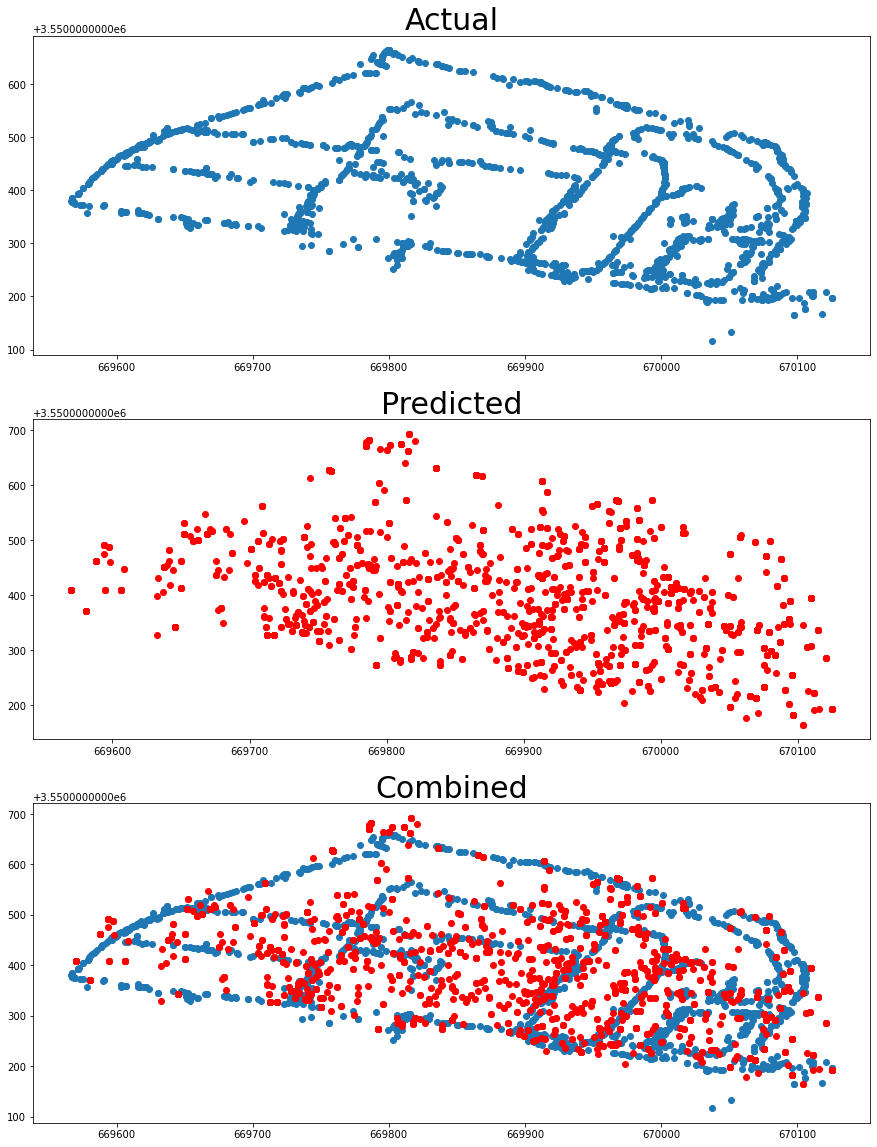

In [34]:
fig, ax = plt.subplots(3)

ax[0].scatter(lon_test,lat_test)
fig.set_size_inches(15,20)
ax[0].set_title("Actual", size= 30)
ax[1].scatter(pred_lon,pred_lat, color="red")
ax[1].set_title("Predicted", size= 30)
ax[2].scatter(lon_test,lat_test)
ax[2].scatter(pred_lon,pred_lat, color="red")
ax[2].set_title("Combined", size= 30)


In [35]:
results, difs_df_sorted=calculate_diff(lon_test,pred_lon,lat_test,pred_lat)

In [36]:
results

,lon_test,pred_lon,lat_test,pred_lat,diff
0,50.834,92.2280,365.389,381.91,44.569122
1,48.341,20.9780,342.286,346.16,27.635876
2,514.159,420.6030,303.744,277.41,97.191588
3,262.539,279.7280,176.157,174.66,17.254064
4,500.047,526.7905,83.902,86.66,26.885337
...,...,...,...,...,...
1904,502.515,483.7905,332.697,358.16,31.606507
1905,232.614,378.0405,546.655,390.16,213.634154
1906,115.119,78.6655,222.882,226.16,36.600587
1907,172.436,419.1030,253.661,208.91,250.693560


In [37]:
difs_df_sorted.describe()

,diff
count,1909.000000
mean,67.674264
std,72.956361
min,0.691705
25%,17.630811
50%,35.387918
75%,97.011827
max,474.081253


In [38]:
print(difs_df_sorted.quantile(q=0.8))
print(difs_df_sorted.quantile(q=0.85))
print(difs_df_sorted.quantile(q=0.9))
print(difs_df_sorted.median())


diff    117.092484
Name: 0.8, dtype: float64
diff    141.370309
Name: 0.85, dtype: float64
diff    170.871442
Name: 0.9, dtype: float64
diff    35.387918
dtype: float64
